In [1]:
import os
import tensorflow as tf
from keras import layers
from keras import Model
from os import getcwd
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop
import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout,GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam


C:\Users\joshi\Anaconda3\envs\tfcpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\joshi\Anaconda3\envs\tfcpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\joshi\Anaconda3\envs\tfcpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\joshi\Anaconda3\envs\tfcpu\lib\site-packages\tensorflow\python\f

In [2]:

model = keras.applications.VGG16(input_shape = (224, 224, 3), 
                                include_top = False, 
                                weights = 'imagenet')


for layer in model.layers:
    layer.trainable = False
    
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0    

In [3]:
last_layer = model.get_layer('block5_pool')
last_output = last_layer.output
x = layers.GlobalAveragePooling2D()(last_output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)  
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)  

x = keras.layers.Dense(1,activation='sigmoid')(x)           

model = Model( model.input, x) 

model.compile(optimizer = Adam(lr=0.001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_______________________________

In [4]:
data_dir = "C:\\Users\\joshi\\OneDrive\\Desktop\\NIT Surat\\COVID-CT-master\\Data" # Your Dataset Location Path
train_dir = os.path.join(data_dir, 'Train')
val_dir = os.path.join(data_dir, 'Val')
train_malaria_dir = os.path.join(train_dir, 'COVID') #Replace the folder names
train_uninfected_dir = os.path.join(train_dir, 'NON-COVID')
validation_malaria_dir = os.path.join(val_dir, 'COVID')
validation_uninfected_dir = os.path.join(val_dir, 'NON-COVID')

train_malaria_fnames = os.listdir(train_malaria_dir)
train_uninfected_fnames = os.listdir(train_uninfected_dir)
validation_malaria_fnames = os.listdir(validation_malaria_dir)
validation_uninfected_fnames = os.listdir(validation_uninfected_dir)

print(len(train_malaria_fnames))
print(len(validation_malaria_fnames))
print(len(train_uninfected_fnames))
print(len(validation_uninfected_fnames))

956
60
1170
58


In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   
                                   )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=8,
                                                    class_mode='binary',
                                                    target_size=(224, 224)
                                                    )
validation_datagen = ImageDataGenerator(rescale=1./255)
 

validation_generator = validation_datagen.flow_from_directory(val_dir,
                                                              batch_size=8,
                                                              class_mode='binary',
                                                              target_size=(224, 224))


Found 2125 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [6]:
import keras
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [7]:
history = model.fit_generator(train_generator,
            validation_data = validation_generator,callbacks = [ es],
            epochs = 25)


Epoch 1/25
266/266 [==============================] - 284s 1s/step - loss: 0.6867 - acc: 0.5864 - val_loss: 0.6465 - val_acc: 0.5593
Epoch 2/25
266/266 [==============================] - 289s 1s/step - loss: 0.6083 - acc: 0.6739 - val_loss: 0.8771 - val_acc: 0.5678
Epoch 3/25
266/266 [==============================] - 289s 1s/step - loss: 0.5606 - acc: 0.7087 - val_loss: 0.6748 - val_acc: 0.6780
Epoch 4/25
266/266 [==============================] - 289s 1s/step - loss: 0.5284 - acc: 0.7412 - val_loss: 0.6028 - val_acc: 0.6441
Epoch 5/25
266/266 [==============================] - 290s 1s/step - loss: 0.5191 - acc: 0.7332 - val_loss: 0.7036 - val_acc: 0.7203
Epoch 6/25
266/266 [==============================] - 288s 1s/step - loss: 0.4837 - acc: 0.7586 - val_loss: 0.6586 - val_acc: 0.6864
Epoch 7/25
266/266 [==============================] - 288s 1s/step - loss: 0.4839 - acc: 0.7722 - val_loss: 0.9117 - val_acc: 0.6949
Epoch 8/25
266/266 [==============================] - 288s 1s/step -

In [8]:
test_dir = os.path.join(data_dir, 'Test')
test_malaria_dir = os.path.join(test_dir, 'COVID') #Replace the folder names
test_uninfected_dir = os.path.join(test_dir, 'NON-COVID')
test_malaria_fnames = os.listdir(test_malaria_dir)
test_uninfected_fnames = os.listdir(test_uninfected_dir)
print(len(test_malaria_fnames))
print(len(test_uninfected_fnames))

98
105


In [9]:
testGenerator = ImageDataGenerator().flow_from_directory(test_dir, 
                                                      batch_size=16,
                                                    class_mode='binary',shuffle=False,target_size=(224,224)
                                                      )

Found 203 images belonging to 2 classes.


Confusion Matrix


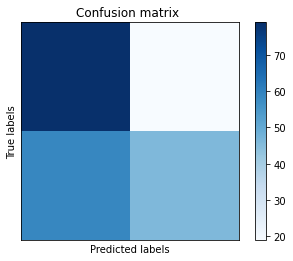

Classification Report
              precision    recall  f1-score   support

           0       0.57      0.81      0.67        98
           1       0.71      0.44      0.54       105

    accuracy                           0.62       203
   macro avg       0.64      0.62      0.61       203
weighted avg       0.64      0.62      0.60       203



In [10]:
import numpy as np
import sklearn.metrics as metrics
Y_pred = model.predict_generator(testGenerator, steps = np.ceil(testGenerator.samples / testGenerator.batch_size),workers=0)
y_pred = np.where(Y_pred>0.5, 1, 0)
print('Confusion Matrix')
cm = metrics.confusion_matrix(testGenerator.classes, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

print('Classification Report')
print(metrics.classification_report(testGenerator.classes, y_pred))

In [11]:
metrics.accuracy_score(testGenerator.classes, y_pred)

0.6157635467980296

In [12]:
metrics.roc_auc_score(y_pred, testGenerator.classes)

0.6400780379041249